In [1]:
%cd ../../
from subjectivity.subjectivity_classifier import SubjectivityClassifier
classifier = SubjectivityClassifier(model_filename='./data/save/subj-29.tf',
                                    word_filename='./data/word_embeddings/glove.6B.50d.txt')

/home/alce/src/subjectivity
INFO:tensorflow:Restoring parameters from ./data/save/subj-29.tf


In [2]:
def count_sentences_in_dict_attribute(d, attribute):
    return len(d[attribute])

In [3]:
import os
path = './data/MPQA_files/'
files = [f for f in os.listdir(path)]
subjective_fraction_list = []
for f in files:
    with open(path + str(f)) as file:
        text = file.read()
        result = classifier.classify_sentences_in_text(text)
        objective_sentences = count_sentences_in_dict_attribute(result, 'objective')
        subjective_sentences = count_sentences_in_dict_attribute(result, 'subjective')
        total_sentences = objective_sentences + objective_sentences
        subjective_fraction_list.append(subjective_sentences / total_sentences)

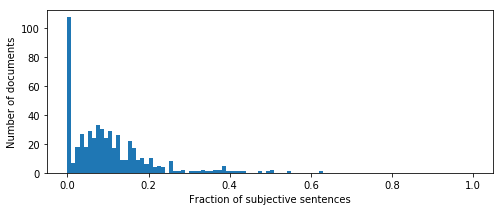

In [5]:
import matplotlib.pyplot as plt
import numpy as np
hist, bins = np.histogram(subjective_fraction_list, bins=100, range=[0,1])
center = (bins[:-1] + bins[1:]) / 2
w = np.diff(bins)
_, ax = plt.subplots(figsize=(8,3))
ax.bar(center, hist, align='center', width=w)
ax.set_xlabel('Fraction of subjective sentences')
ax.set_ylabel('Number of documents')
plt.show()
